In [1]:
%load_ext autoreload
%autoreload 2

In [233]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Loading data


In [41]:
df_xg = pd.read_csv("/home/thibault/code/patrickevans29/ipl_prediction_model/raw_data/final_to_model_df.csv")

In [ ]:
df = df_xg.copy()

In [4]:
df.head()


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,innings_total,TeamA_batting_average,TeamB_batting_average,TeamA_innings_total,TeamB_innings_total
0,1312200,ahmedabad,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,gujarat titans,130,155.397906,166.437500,130.0,133.0
1,1312199,ahmedabad,2022-05-27,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,field,rajasthan royals,157,155.707965,155.397906,157.0,161.0
2,1312198,kolkata,2022-05-25,2022,eliminator,royal challengers bangalore,lucknow super giants,eden gardens,lucknow super giants,field,royal challengers bangalore,207,155.707965,169.866667,207.0,193.0
3,1312197,kolkata,2022-05-24,2022,qualifier 1,rajasthan royals,gujarat titans,eden gardens,gujarat titans,field,gujarat titans,188,155.397906,166.437500,188.0,191.0
4,1304116,mumbai,2022-05-22,2022,70,sunrisers hyderabad,punjab kings,wankhede stadium,sunrisers hyderabad,bat,punjab kings,157,155.546053,158.518349,157.0,160.0


# removing useless columns

In [5]:
df = df.drop(columns=["Date", "innings_total", "TeamA_innings_total", "TeamB_innings_total"])

In [6]:
df.head()

,ID,City,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,TeamA_batting_average,TeamB_batting_average
0,1312200,ahmedabad,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,gujarat titans,155.397906,166.437500
1,1312199,ahmedabad,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,field,rajasthan royals,155.707965,155.397906
2,1312198,kolkata,2022,eliminator,royal challengers bangalore,lucknow super giants,eden gardens,lucknow super giants,field,royal challengers bangalore,155.707965,169.866667
3,1312197,kolkata,2022,qualifier 1,rajasthan royals,gujarat titans,eden gardens,gujarat titans,field,gujarat titans,155.397906,166.437500
4,1304116,mumbai,2022,70,sunrisers hyderabad,punjab kings,wankhede stadium,sunrisers hyderabad,bat,punjab kings,155.546053,158.518349


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     950 non-null    int64  
 1   City                   950 non-null    object 
 2   Season                 950 non-null    int64  
 3   MatchNumber            950 non-null    object 
 4   Team1                  950 non-null    object 
 5   Team2                  950 non-null    object 
 6   Venue                  950 non-null    object 
 7   TossWinner             950 non-null    object 
 8   TossDecision           950 non-null    object 
 9   WinningTeam            950 non-null    object 
 10  TeamA_batting_average  950 non-null    float64
 11  TeamB_batting_average  948 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 89.2+ KB


# create the model

### define the features and the output

In [8]:
X = df.drop(columns=['WinningTeam'])
y = df['WinningTeam']

### encoding

In [9]:
## defining the list of categorical and numerical features 
categorical_columns = ['City', 'MatchNumber', 'Season', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision']
numerical_columns = ['TeamA_batting_average','TeamB_batting_average']
## apply the encoder, OneHotEncoder for categorical and the RobustScaler for numerical features
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

numerical_transformer = Pipeline([
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ])
## create the pipeline 
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [10]:
## creation of X_encoded with the pipeline
X_encoded = pipeline.fit_transform(X)

/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
## encoding the y for the Classifier
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### dividing the dataset train/test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2)

### Creating the model with a XGBClassifier

In [13]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### predicting y with the test set 

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred

array([12, 12,  2,  6, 11,  8,  0,  6,  8,  6, 11,  2, 15,  8,  8, 15, 14,
       15, 14, 11, 14, 11,  0,  0, 14, 11,  0, 11, 11, 15, 14,  6,  8,  0,
        2,  2,  0,  0,  8, 11, 15, 14,  6, 11, 14, 11,  6,  0,  8, 14, 14,
       14,  8,  8, 11, 10,  8, 14,  6,  1, 12, 11,  2, 15,  8, 14,  8,  8,
       15,  8, 11,  0,  8, 11, 12, 12,  2,  6, 14, 10,  0,  6, 12,  8,  6,
       14, 14,  0, 12,  2,  8,  0,  6,  8,  2, 14, 14, 12, 12, 15,  1,  2,
        0,  8,  2, 11, 15,  8, 10, 14, 14,  0, 12, 12,  6, 12, 12,  6,  6,
        6,  6,  8,  2, 12, 11, 12,  6,  3, 13,  2, 14,  6, 11,  2, 11,  0,
       14, 14, 11,  8, 15,  0, 14, 15, 10,  2,  0,  0, 11, 15,  8,  8,  0,
        2,  8,  2,  8, 14,  0, 10,  8, 15,  8,  8, 12,  0,  2, 15,  8,  8,
       14,  0,  2,  0,  8,  2,  6, 14,  4, 14, 11,  6,  8, 15, 14,  8, 14,
       11,  0,  1])

In [16]:
## inverse the encoding to have the name of the winner
y_pred_names = label_encoder.inverse_transform(y_pred)

In [17]:
y_test_names = label_encoder.inverse_transform(y_test)

In [18]:
compare_result_df = pd.DataFrame({"True winner": y_test_names, "predicted winner": y_pred_names})

In [19]:
compare_result_df

,True winner,predicted winner
0,rajasthan royals,rajasthan royals
1,rajasthan royals,rajasthan royals
2,delhi capitals,delhi capitals
3,sunrisers hyderabad,kolkata knight riders
4,punjab kings,punjab kings
...,...,...
185,mumbai indians,mumbai indians
186,punjab kings,royal challengers bangalore
187,punjab kings,punjab kings
188,chennai super kings,chennai super kings


In [20]:
result_df = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred})

# Ajoutez une colonne pour indiquer si les prédictions sont correctes
result_df['Correct Prediction'] = result_df['True Labels'] == result_df['Predicted Labels']

# Affichez la DataFrame pour vérifier les résultats
print(result_df)

     True Labels  Predicted Labels  Correct Prediction
0             12                12                True
1             12                12                True
2              2                 2                True
3             15                 6               False
4             11                11                True
..           ...               ...                 ...
185            8                 8                True
186           11                14               False
187           11                11                True
188            0                 0                True
189            6                 1               False

[190 rows x 3 columns]


In [21]:
y_pred_series = pd.Series(y_pred_names)
y_pred_series.value_counts()

mumbai indians                 34
royal challengers bangalore    29
chennai super kings            24
punjab kings                   22
kolkata knight riders          20
delhi capitals                 19
rajasthan royals               16
sunrisers hyderabad            15
pune warriors                   5
deccan chargers                 3
gujarat lions                   1
rising pune supergiant          1
gujarat titans                  1
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [23]:
score.mean()

0.5355263157894737

In [30]:
confusion = confusion_matrix(y_test, y_pred)

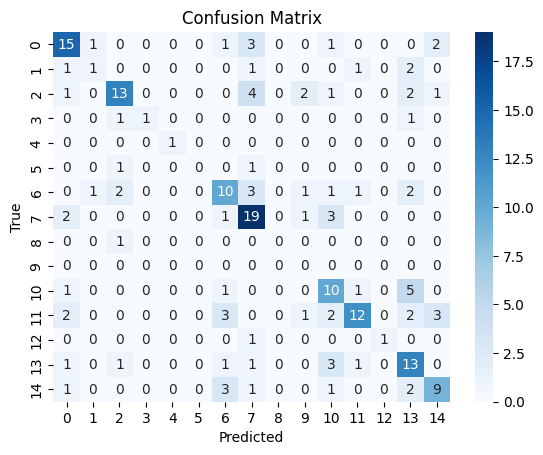

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## accuracy of the model 

In [24]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5526315789473685

## try with binary classification

In [174]:
df = df_xg.copy()

#### create the binary column : team1winner

In [175]:
df['Team1_Win'] = (df['Team1'] == df['WinningTeam']).astype(int)
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,innings_total,TeamA_batting_average,TeamB_batting_average,TeamA_innings_total,TeamB_innings_total,Team1_Win
0,1312200,ahmedabad,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,gujarat titans,130,155.397906,166.437500,130.0,133.0,0
1,1312199,ahmedabad,2022-05-27,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,field,rajasthan royals,157,155.707965,155.397906,157.0,161.0,0
2,1312198,kolkata,2022-05-25,2022,eliminator,royal challengers bangalore,lucknow super giants,eden gardens,lucknow super giants,field,royal challengers bangalore,207,155.707965,169.866667,207.0,193.0,1
3,1312197,kolkata,2022-05-24,2022,qualifier 1,rajasthan royals,gujarat titans,eden gardens,gujarat titans,field,gujarat titans,188,155.397906,166.437500,188.0,191.0,0
4,1304116,mumbai,2022-05-22,2022,70,sunrisers hyderabad,punjab kings,wankhede stadium,sunrisers hyderabad,bat,punjab kings,157,155.546053,158.518349,157.0,160.0,0


In [225]:
(df["Team1_Win"] == True).sum()

480

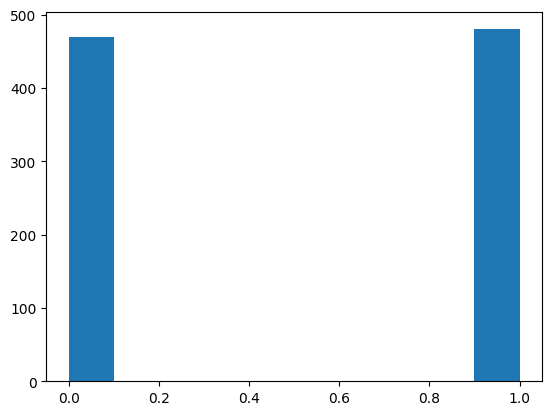

In [227]:
plt.hist(df["Team1_Win"]);

#### encoding

In [176]:
# Create an initiation of the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False) 

In [177]:
# Fit and transform the encoder on the specified columns
encoded_columns = encoder.fit_transform(df[['Team1', 'Team2']])

In [178]:
# Create a DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Team1', 'Team2']))

In [179]:
# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

In [180]:
label_encoder = LabelEncoder()
label_encoder.fit(df_encoded['TossDecision'])

LabelEncoder()

In [181]:
df_encoded['TossDecision'] = label_encoder.transform(df_encoded['TossDecision'])

In [182]:
df_encoded.head(3)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,Team2_kochi tuskers kerala,Team2_kolkata knight riders,Team2_lucknow super giants,Team2_mumbai indians,Team2_pune warriors,Team2_punjab kings,Team2_rajasthan royals,Team2_rising pune supergiant,Team2_royal challengers bangalore,Team2_sunrisers hyderabad
0,1312200,ahmedabad,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1312199,ahmedabad,2022-05-27,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1312198,kolkata,2022-05-25,2022,eliminator,royal challengers bangalore,lucknow super giants,eden gardens,lucknow super giants,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
ohe = OneHotEncoder(sparse_output=False)

In [184]:
ohe.fit(df_encoded[['City']])

OneHotEncoder(sparse_output=False)

In [185]:
df_encoded[ohe.get_feature_names_out()] = ohe.transform(df_encoded[['City']])

In [186]:
df_encoded.drop(columns = ["City"], inplace = True)

In [187]:
df_encoded.shape

(950, 79)

In [188]:
df_encoded.head(3)

,ID,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,...,City_mumbai,City_nagpur,City_navi mumbai,City_port elizabeth,City_pune,City_raipur,City_rajkot,City_ranchi,City_sharjah,City_visakhapatnam
0,1312200,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,0,gujarat titans,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1312199,2022-05-27,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,1,rajasthan royals,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1312198,2022-05-25,2022,eliminator,royal challengers bangalore,lucknow super giants,eden gardens,lucknow super giants,1,royal challengers bangalore,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
def map_match_number(value):
    if isinstance(value, int) or value.isnumeric():
        return 0
    elif isinstance(value, str):
        return 1
    else:
        return value

In [190]:
df_encoded['MatchNumber'] = df_encoded['MatchNumber'].apply(map_match_number)

In [191]:
df_encoded.rename(columns={'MatchNumber': 'MatchImportance'}, inplace=True)

In [192]:
ohe = OneHotEncoder(sparse_output=False)

In [193]:
ohe.fit(df_encoded[['Venue']])

OneHotEncoder(sparse_output=False)

In [194]:
df_encoded[ohe.get_feature_names_out()] = ohe.transform(df_encoded[['Venue']])

In [195]:
df_encoded.drop(columns = ["Venue"], inplace = True)

In [196]:
def map_toss_winner(row):
    if row['TossWinner'] == row['Team1']:
        return 1
    elif row['TossWinner'] == row['Team2']:
        return 0
    else:
        return -1

In [197]:
df_encoded['TossWinner'] = df_encoded.apply(map_toss_winner, axis=1)

In [198]:
df_encoded.drop(["Team1", "Team2", "WinningTeam", "Date", "innings_total", "TeamA_innings_total", "TeamB_innings_total"], axis=1, inplace=True)

In [199]:
df_encoded.columns

Index(['ID', 'Season', 'MatchImportance', 'TossWinner', 'TossDecision',
       'TeamA_batting_average', 'TeamB_batting_average', 'Team1_Win',
       'Team1_chennai super kings', 'Team1_deccan chargers',
       ...
       'Venue_saurashtra cricket association stadium',
       'Venue_sawai mansingh stadium',
       'Venue_shaheed veer narayan singh international stadium',
       'Venue_sharjah cricket stadium', 'Venue_sheikh zayed stadium',
       'Venue_st george's park', 'Venue_subrata roy sahara stadium',
       'Venue_supersport park',
       'Venue_vidarbha cricket association stadium, jamtha',
       'Venue_wankhede stadium'],
      dtype='object', length=107)

In [200]:
ohe = OneHotEncoder(sparse_output=False)

In [201]:
ohe.fit(df_encoded[['Season']])

OneHotEncoder(sparse_output=False)

In [202]:
df_encoded[ohe.get_feature_names_out()] = ohe.transform(df_encoded[['Season']])

In [203]:
df_encoded.drop(columns = ["Season"], inplace = True)

#### scaling and encoding

In [204]:
columns_scaler = ['TeamA_batting_average', 'TeamB_batting_average']

In [205]:
# Robust Scaler
scaler = RobustScaler()

In [206]:
# fit
scaler.fit(df_encoded[columns_scaler]) 

RobustScaler()

In [207]:
df_encoded[columns_scaler] = scaler.transform(df_encoded[columns_scaler]) 

In [208]:
df_encoded.head(5)

,ID,MatchImportance,TossWinner,TossDecision,TeamA_batting_average,TeamB_batting_average,Team1_Win,Team1_chennai super kings,Team1_deccan chargers,Team1_delhi capitals,...,Season_2013,Season_2014,Season_2015,Season_2016,Season_2017,Season_2018,Season_2019,Season_2020,Season_2021,Season_2022
0,1312200,1,1,0,-0.062514,2.286254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1312199,1,0,1,0.000000,-0.031098,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1312198,1,0,1,0.000000,3.006079,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1312197,1,0,1,-0.062514,2.286254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1304116,0,1,0,-0.032645,0.623923,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [209]:
df_encoded.isna().sum().head(20) #  MISSING VALUES

ID                              0
MatchImportance                 0
TossWinner                      0
TossDecision                    0
TeamA_batting_average           0
TeamB_batting_average           2
Team1_Win                       0
Team1_chennai super kings       0
Team1_deccan chargers           0
Team1_delhi capitals            0
Team1_gujarat lions             0
Team1_gujarat titans            0
Team1_kochi tuskers kerala      0
Team1_kolkata knight riders     0
Team1_lucknow super giants      0
Team1_mumbai indians            0
Team1_pune warriors             0
Team1_punjab kings              0
Team1_rajasthan royals          0
Team1_rising pune supergiant    0
dtype: int64

In [210]:
# drop nan
df_encoded = df_encoded.dropna()

In [212]:
X = df_encoded.drop('Team1_Win', axis=1)
y = df_encoded.Team1_Win

#### split the dataset 

In [213]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### creation of the model

In [214]:
model = XGBClassifier()
model.fit(X_train, y_train)

/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_ca

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [215]:
y_pred = model.predict(X_test)

/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_ca

In [216]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

#### calculate the model accuracy

In [217]:
score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_ca

In [218]:
score.mean()

0.4816138027187174

#### Confusion Matrix

In [219]:
confusion = confusion_matrix(y_test, y_pred)

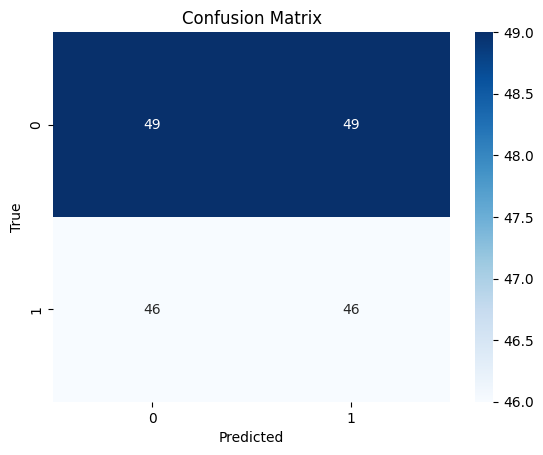

In [220]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Gridsearch

In [229]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Créer le modèle XGBoost
xgb = XGBClassifier(objective = "binary:logistic")

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Effectuer la recherche d'hyperparamètres sur les données d'entraînement
grid_search.fit(X_train, y_train)

/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is

Meilleurs paramètres trouvés :
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Meilleure exactitude (accuracy) : 54.10%


In [231]:
grid_search.best_score_

0.5409898919484142

In [234]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Créer le modèle XGBoost
xgb = XGBClassifier(objective = "binary:logistic")

# Créer l'objet GridSearchCV
random_search = RandomizedSearchCV(xgb, 
                                 param_distributions=param_grid, 
                                 n_iter = 50,
                                 cv=5, 
                                 scoring="accuracy", 
                                 n_jobs=-1)

# Effectuer la recherche d'hyperparamètres sur les données d'entraînement
random_search.fit(X_train, y_train)

/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/thibault/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='accuracy')

In [235]:
random_search.best_score_

0.5304548623213663

In [236]:
random_search.best_params_

{'subsample': 0.9,
 'n_estimators': 200,
 'max_depth': 4,
 'learning_rate': 0.01,
 'colsample_bytree': 0.9}